# Opportunity Youth Table Visulization 

## Outcome: 
    1. Opportunity youth table
    2. Opportunity youth table visualization 
    3. Calculate change of opportunity youth status from 2014 to 2017

## Import libraty

In [399]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
# Set plot space as inline for inline plots and qt for external plots
%matplotlib inline

## Create engine

In [400]:
engine = create_engine("postgresql:///opportunity_youth")

## Read SQL query the create dataframe (three age range and total)

In [401]:
sqlpath1618 = 'sql/oy_16_18.sql'
scriptFile1618 = open(sqlpath1618,'r')
script1618 = scriptFile1618.read()
df1618 = pd.read_sql(script1618, con = engine)

sqlpath1921 = 'sql/oy_19_21.sql'
scriptFile1921 = open(sqlpath1921,'r')
script1921 = scriptFile1921.read()
df1921 = pd.read_sql(script1921, con = engine)

sqlpath2224 = 'sql/oy_22_24.sql'
scriptFile2224 = open(sqlpath2224,'r')
script2224 = scriptFile2224.read()
df2224 = pd.read_sql(script2224, con = engine)

sqlpath_total = 'sql/oy_total.sql'
scriptFile_total = open(sqlpath_total,'r')
script_total = scriptFile_total.read()
df_total = pd.read_sql(script_total, con = engine)

## Combine four dataframe using pd.concat, set index, and change columns names

In [495]:
df_oy_2017 = pd.concat([df1921.iloc[:,0:1], df1618.iloc[:,1:], df1921.iloc[:,1:], df2224.iloc[:,1:], df_total.iloc[:,1:]], axis=1)
# fill N/A value 0
df_oy_2017 = df_oy_2017.fillna(0) 
# set educational attainment as index
df_oy_2017['index'] = ['No diploma', 'HS diploma or GED', 'Some college, no degree', 'Degree (Associate or higher)']
df_oy_2017 = df_oy_2017.set_index('index')
del df_oy_2017['degree']
# change columns names
df_oy_2017.rename(columns={"popluation_16_18":"16-18 Population",
                           "ratio_16_18":"16-18 100%",
                           "popluation_19_21":"19-21 Population",
                           "ratio_19_21":"19-21 100%",
                           "popluation_22_24":"22-24 Population",
                           "ratio_22_24":"22-24 100%",
                           "popluation_total":"Total Population",
                           "ratio_total":"Total 100%",
                          }, inplace = True)

In [496]:
df_oy_2017

,16-18 Population,16-18 100%,19-21 Population,19-21 100%,22-24 Population,22-24 100%,Total Population,Total 100%
index,,,,,,,,
No diploma,1083.0,54.0,1210.0,28.0,1488.0,26.0,3781.0,31.0
HS diploma or GED,790.0,39.0,2312.0,54.0,2284.0,40.0,5386.0,45.0
"Some college, no degree",143.0,7.0,712.0,16.0,1275.0,22.0,2130.0,18.0
Degree (Associate or higher),0.0,0.0,86.0,2.0,648.0,11.0,734.0,6.0


Export opportunity youth table as csv file

In [113]:
# df_oy_2017.to_csv(r'data/oy_table_2017.csv')

In [653]:
temp = df_oy_2017.T.copy()
temp.drop(index=['16-18 100%','19-21 100%','22-24 100%','Total 100%'],inplace=True)
temp['Sum'] = temp.sum(axis=1)
for i in range(len(temp.keys())):
    for j in range(len(temp.index)):
        perc = 100 * temp.iloc[j,i] / temp.iloc[len(temp.index)-1,len(temp.keys())-1]
        temp.iloc[j,i] =round(perc, 0)
df_oy_2017_percent = temp.T.copy()
df_oy_2017_percent.rename(columns={"16-18 Population":"16-18",
                           "19-21 Population":"19-21",
                           "22-24 Population":"22-24",
                           "Total Population":"Total",
                          }, inplace = True)

In [654]:
df_oy_2017_percent

,16-18,19-21,22-24,Total
index,,,,
No diploma,9.0,10.0,12.0,31.0
HS diploma or GED,7.0,19.0,19.0,45.0
"Some college, no degree",1.0,6.0,11.0,18.0
Degree (Associate or higher),0.0,1.0,5.0,6.0
Sum,17.0,36.0,47.0,100.0


Export percentage change in 2017 as csv file

In [652]:
#df_oy_2017_percent.to_csv(r'data/oy_table_2017_percent.csv')

## Create population and opportunity youth table of 2014

### Total population table

In [706]:
# key in table values
total_2014 = {'16-18': [2805, 587, 46661], 
       '19-21': [7284, 2049, 32318], 
       '22-24': [8728, 2877, 36426]}
df_total_2014 = pd.DataFrame(data=total_2014, index = ['Opportunity Youth', 'Working Without Diploma', 'Not An Opportunity Youth'])
# Calculate total values
df_total_2014['Total'] = df_total_2014['16-18'] + df_total_2014['19-21'] + df_total_2014['22-24']
# Calculate percentage
df_total_2014['16-18 100%'] = round(df_total_2014['16-18']*100 / df_total_2014['16-18'].sum(),0)
df_total_2014['19-21 100%'] = round(df_total_2014['19-21']*100 / df_total_2014['19-21'].sum(),0)
df_total_2014['22-24 100%'] = round(df_total_2014['22-24']*100 / df_total_2014['22-24'].sum(),0)
df_total_2014['Total 100%'] = round(df_total_2014['Total']*100 / df_total_2014['Total'].sum(),0)

In [390]:
df_total_2014

,16-18,19-21,22-24,Total,16-18 100%,19-21 100%,22-24 100%,Total 100%
Opportunity Youth,2805,7284,8728,18817,6.0,17.0,18.0,13.0
Working Without Diploma,587,2049,2877,5513,1.0,5.0,6.0,4.0
Not An Opportunity Youth,46661,32318,36426,115405,93.0,78.0,76.0,83.0


Export total population table of 2014 to json and csv file

In [448]:
# df_total_2014.to_json(r'data/total_population_2014.json')
# df_total_2014.to_csv(r'data/total_population_2014.csv')

### Create opportunity youth table of 2014

In [391]:
oy_2014 = {'16-18': [1610, 985, 179, 31], 
       '19-21': [2048, 3349, 1666, 221], 
       '22-24': [1981, 3067, 1763, 1917]}
df_oy_2014 = pd.DataFrame(data=oy_2014, index = ['No diploma', 'HS diploma or GED', 'Some college, no degree', 'Degree (Associate or higher)'])
df_oy_2014['Total'] = df_oy_2014['16-18'] + df_oy_2014['19-21'] + df_oy_2014['22-24']
df_oy_2014['16-18 100%'] = round(df_oy_2014['16-18']*100 / df_oy_2014['16-18'].sum(),0)
df_oy_2014['19-21 100%'] = round(df_oy_2014['19-21']*100 / df_oy_2014['19-21'].sum(),0)
df_oy_2014['22-24 100%'] = round(df_oy_2014['22-24']*100 / df_oy_2014['22-24'].sum(),0)
df_oy_2014['Total 100%'] = round(df_oy_2014['Total']*100 / df_oy_2014['Total'].sum(),0)

In [393]:
df_oy_2014

,16-18,19-21,22-24,Total,16-18 100%,19-21 100%,22-24 100%,Total 100%
No diploma,1610,2048,1981,5639,57.0,28.0,23.0,30.0
HS diploma or GED,985,3349,3067,7401,35.0,46.0,35.0,39.0
"Some college, no degree",179,1666,1763,3608,6.0,23.0,20.0,19.0
Degree (Associate or higher),31,221,1917,2169,1.0,3.0,22.0,12.0


## Calculate percentage change divided by population of opportunity youth in 2014

In [655]:
temp = pd.DataFrame()
temp = df_oy_2014.T.copy()
temp.drop(index=['16-18 100%','19-21 100%','22-24 100%','Total 100%'],inplace=True)
temp['Sum'] = temp.sum(axis=1)
for i in range(len(temp.keys())):
    for j in range(len(temp.index)):
        perc = 100 * temp.iloc[j,i] / temp.iloc[len(temp.index)-1,len(temp.keys())-1]
        temp.iloc[j,i] =round(perc, 0)
df_oy_2014_percent = temp.T.copy()


In [656]:
df_oy_2014_percent

,16-18,19-21,22-24,Total
No diploma,9.0,11.0,11.0,30.0
HS diploma or GED,5.0,18.0,16.0,39.0
"Some college, no degree",1.0,9.0,9.0,19.0
Degree (Associate or higher),0.0,1.0,10.0,12.0
Sum,15.0,39.0,46.0,100.0


Export percentage change in 2014 as csv file

In [657]:
# df_oy_2014_percent.to_csv(r'data/oy_table_2014_percent.csv')

Export opportunity youth table of 2014 to json and csv file

In [447]:
# df_oy_2014.to_json(r'data/oy_table_2014.json')
# df_oy_2014.to_csv(r'data/oy_table_2014.csv')

## Visualize opportunity youth 2014 and 2017 (Percentage)

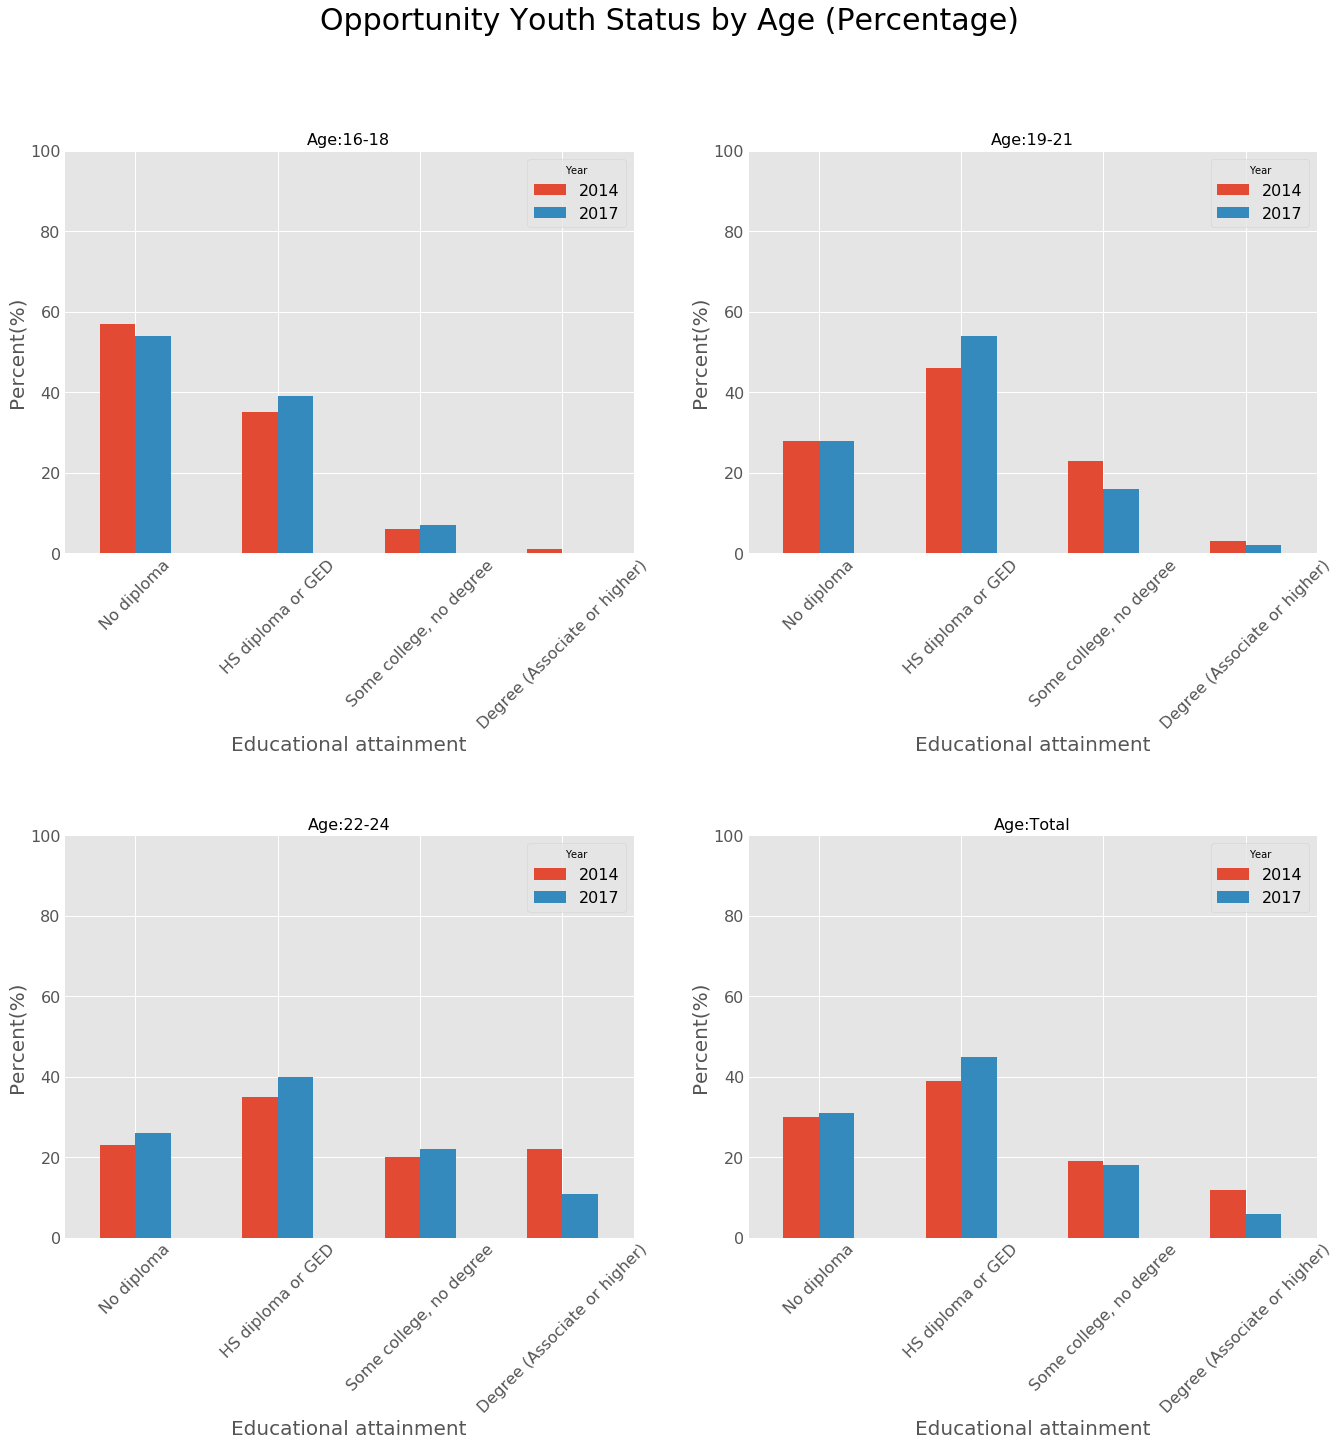

In [460]:
plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
fig.suptitle('Opportunity Youth Status by Age (Percentage)', fontsize=30)
plt.subplots_adjust(wspace=0.2, hspace=0.7)

for i in range(0,4):
#     subplot row and column
    row = (i)//2
    col = i%2
    ax = axes[row][col]
    
#     import 2014 and 2017 table
    df = pd.concat([df_oy_2014.iloc[:,i+4],df_oy_2017.iloc[:,2*i+1]], axis=1)
    df.plot.bar(ax=ax, fontsize=16)
    
#     age group title
    title = df_oy_2014.columns[i]
#     set title of each axes in different age 
    ax.set_title("Age:"+title.format(n), fontsize=16)
#     set label and legend
    ax.set_xlabel('Educational attainment', fontsize=20)
    ax.set_ylabel('Percent(%)', fontsize=20)
    ax.legend(['2014','2017'], title='Year', fontsize=16)
#     rotate x labels
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.set_ylim(0, 100)
    
fig.savefig('visualization/Oy_fig_percentage.png')

Export each plot if needed

''

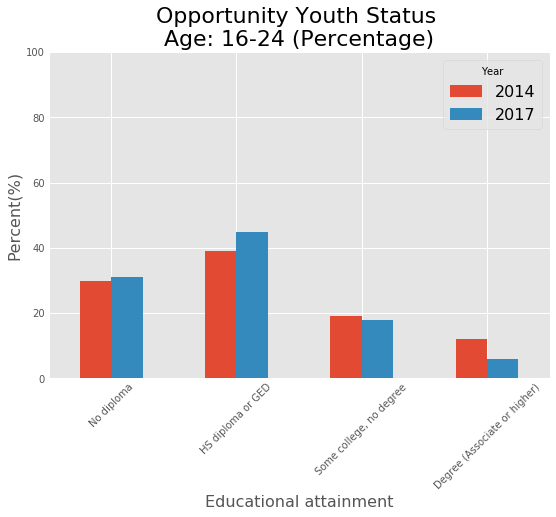

In [478]:
# i = 3 # 0:16-18 1:19-21 2:22-24 3:16-24
# df = pd.concat([df_oy_2014.iloc[:,i+4],df_oy_2017.iloc[:,2*i+1]], axis=1)
# df.plot.bar(figsize=(8,6))
# plt.title('Opportunity Youth Status \nAge: 16-24 (Percentage)',fontsize=22)
# plt.xlabel('Educational attainment', fontsize=16)
# plt.ylabel('Percent(%)', fontsize=16)
# plt.legend(['2014','2017'], title='Year', fontsize=16)
# plt.xticks(rotation=45)
# plt.ylim(0, 100)
# plt.savefig('visualization/Oy_fig_percentage_1624.png', bbox_inches='tight');
# ;

## Visualize opportunity youth 2014 and 2017 (Population)

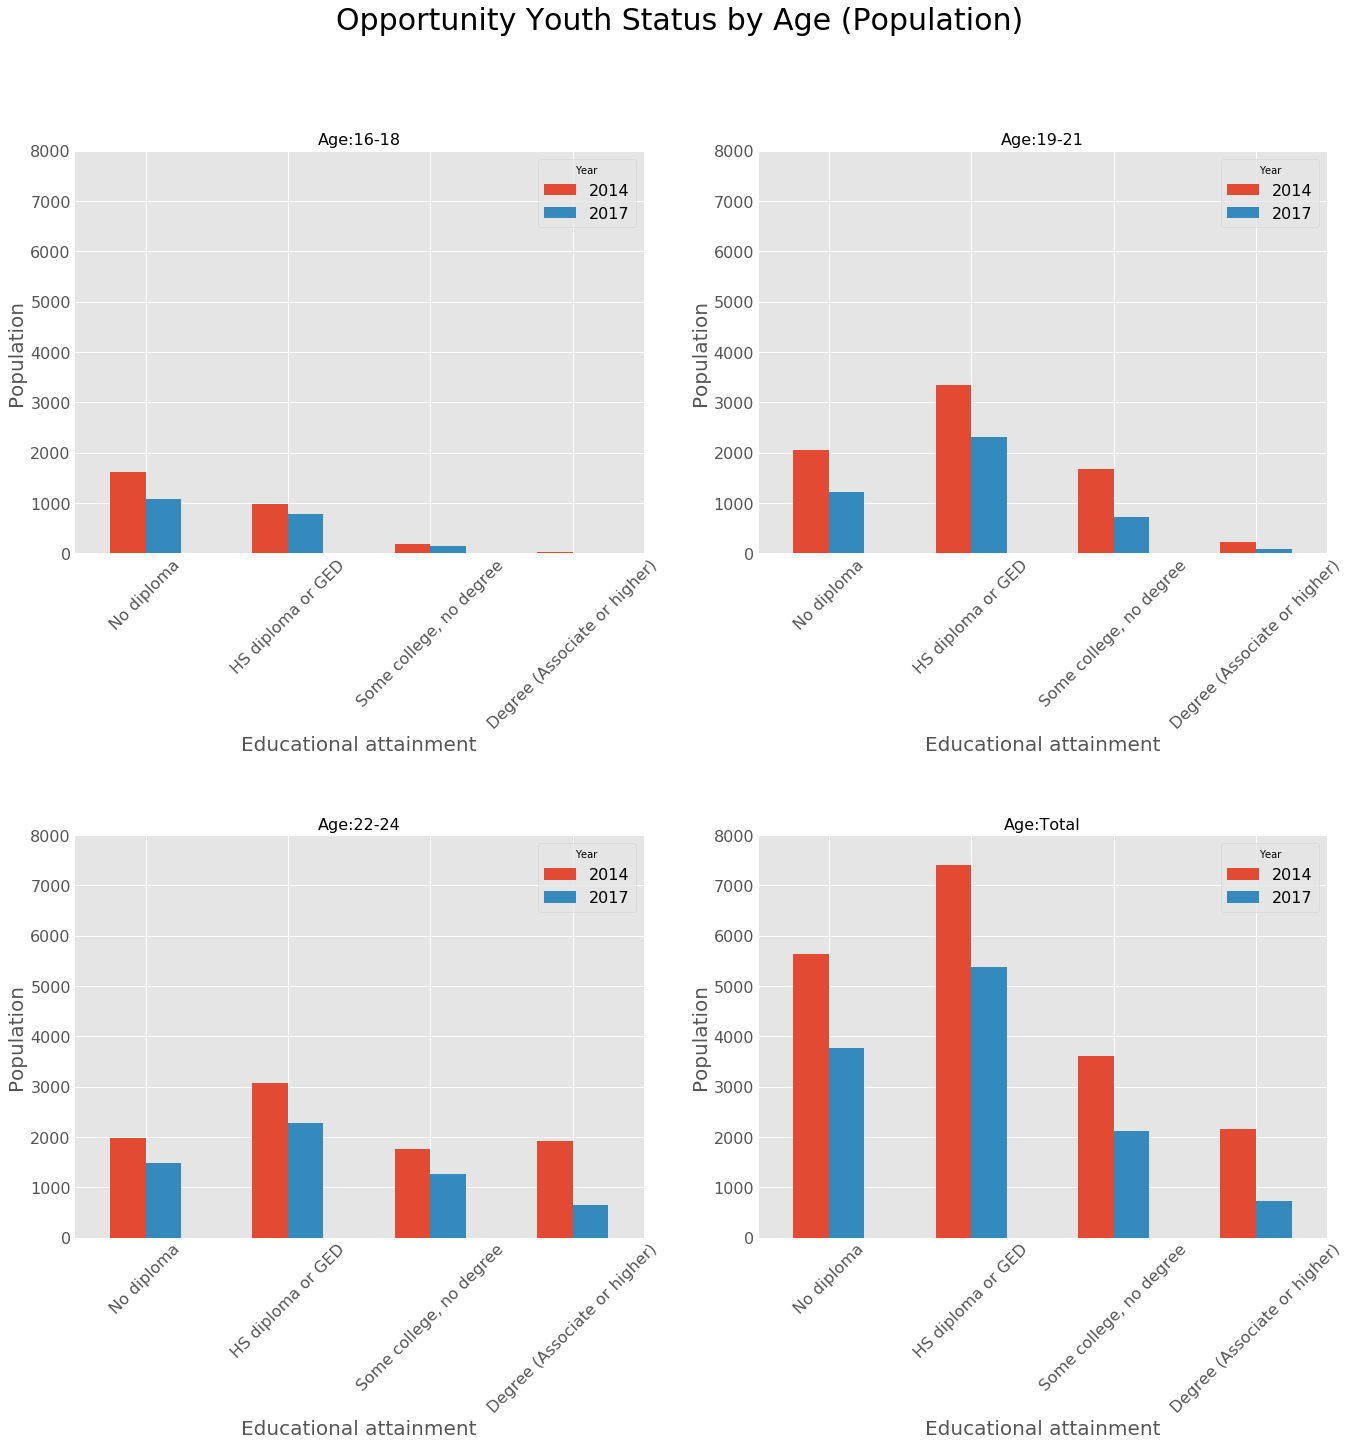

In [461]:
plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
fig.suptitle('Opportunity Youth Status by Age (Population)', fontsize=30)
plt.subplots_adjust(wspace=0.2, hspace=0.7)

for i in range(0,4):
#     subplot row and column
    row = (i)//2
    col = i%2
    ax = axes[row][col]
    
#     import data needed
    df = pd.concat([df_oy_2014.iloc[:,i],df_oy_2017.iloc[:,2*i]], axis=1)
    df.plot.bar(ax=ax, fontsize=16)
#     ax.invert_yaxis()
    
#     age group title
    title = df_oy_2014.columns[i]
#     set title of each axes in different age 
    ax.set_title("Age:"+title.format(n), fontsize=16)
#     set x and y label
    ax.set_xlabel('Educational attainment', fontsize=20)
    ax.set_ylabel('Population', fontsize=20)
#     legend
    ax.legend(['2014','2017'], title='Year', fontsize=16)
#     rotate x labels
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
#     y axis limit
    ax.set_ylim(0, 8000)
fig.savefig('visualization/Oy_fig_population.png')   

Export each plot if needed

''

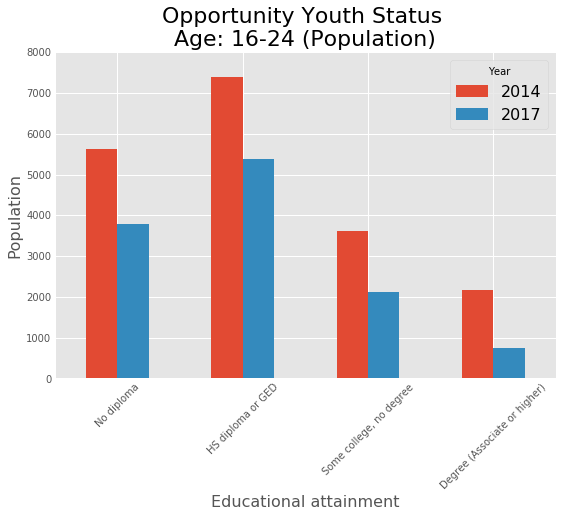

In [484]:
# i = 3 # 0:16-18 1:19-21 2:22-24 3:16-24

# df = pd.concat([df_oy_2014.iloc[:,i],df_oy_2017.iloc[:,2*i]], axis=1)
# df.plot.bar(figsize=(8,6))
# plt.title('Opportunity Youth Status \nAge: 16-24 (Population)',fontsize=22)
# plt.xlabel('Educational attainment', fontsize=16)
# plt.ylabel('Population', fontsize=16)
# plt.legend(['2014','2017'], title='Year', fontsize=16)
# plt.xticks(rotation=45)
# plt.ylim(0, 8000)
# plt.savefig('visualization/Oy_fig_population_1624.png', bbox_inches='tight');
# ;

## Calculate percentage change of opportunity youth status between 2014 and 2017

In [701]:
df_oy_diff_percent = pd.DataFrame()
col_list =['16-18', '19-21', '22-24', 'Total']
for col in col_list:
    df_oy_diff_percent[col] = df_oy_2017_percent[col] - df_oy_2014_percent[col]
df_oy_diff_percent.drop(index='Sum', inplace=True)
df_oy_diff_percent

,16-18,19-21,22-24,Total
index,,,,
No diploma,0.0,-1.0,1.0,1.0
HS diploma or GED,2.0,1.0,3.0,6.0
"Some college, no degree",0.0,-3.0,2.0,-1.0
Degree (Associate or higher),0.0,0.0,-5.0,-6.0


Export percentage change of opportunity youth status to csv file.

In [702]:
# df_oy_diff_percent.to_csv(r'data/oy_diff_percent.csv')

## Visualize percentage change of opportunity youth status

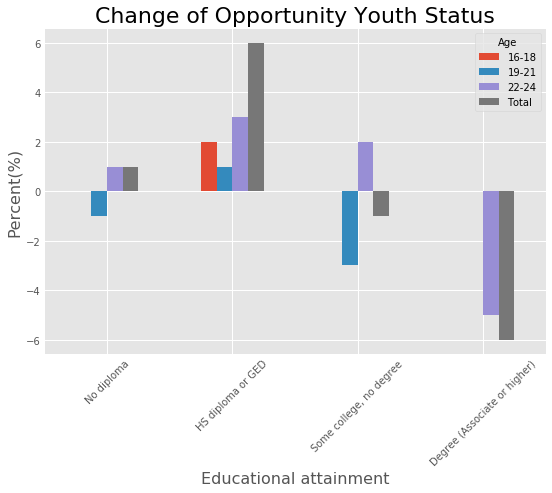

In [715]:
df_oy_diff_percent.plot.bar(figsize=(8,6))
plt.title('Change of Opportunity Youth Status',fontsize=22)
plt.xlabel('Educational attainment', fontsize=16)
plt.ylabel('Percent(%)', fontsize=16)
plt.legend(title='Age')
plt.xticks(rotation=45)
plt.savefig('visualization/ChangeOfOY_Percentage.png', bbox_inches='tight');

## Caculate percentage change of opportunity youth status by educational attainment

''

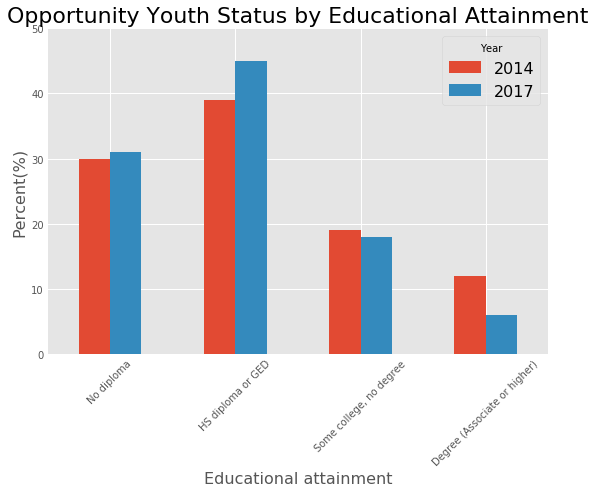

In [713]:
df_edu = pd.concat([df_oy_2014_percent['Total'],df_oy_2017_percent['Total']], axis=1)
df_edu.columns = [2014,2017]
df_edu.drop(index='Sum', inplace=True)
df_edu.plot.bar(figsize=(8,6))
plt.title('Opportunity Youth Status by Educational Attainment',fontsize=22)
plt.xlabel('Educational attainment', fontsize=16)
plt.ylabel('Percent(%)', fontsize=16)
plt.legend(['2014','2017'], title='Year', fontsize=16)
plt.xticks(rotation=45)
plt.ylim(0, 50)
plt.savefig('visualization/ChangeOfOY_ByEdu_Percentage.png', bbox_inches='tight')
;

## Caculate percentage change of opportunity youth status by ages

''

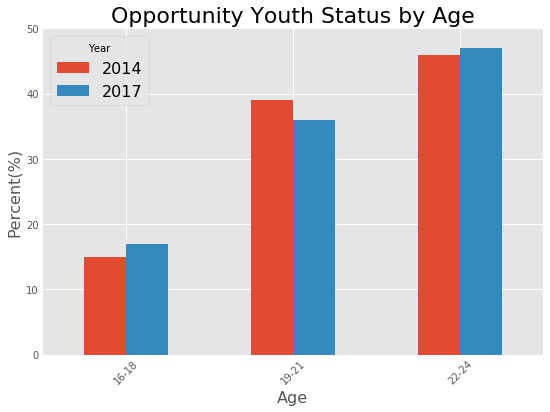

In [712]:
# age educattion 
df_age = pd.concat([df_oy_2014_percent.loc['Sum'],df_oy_2017_percent.loc['Sum']], axis=1)
df_age.columns = [2014,2017]
df_age.drop(index='Total', inplace=True)
df_age.plot.bar(figsize=(8,6))
plt.title('Opportunity Youth Status by Age',fontsize=22)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Percent(%)', fontsize=16)
plt.legend(['2014','2017'], title='Year', fontsize=16)
plt.xticks(rotation=45)
plt.ylim(0, 50)
plt.savefig('visualization/ChangeOfOY_ByAge_Percentage.png', bbox_inches='tight')
;